In [1]:
import numpy as np
import matplotlib.pyplot as plt

Initial Condition

In [2]:
C = 1 
R = 1
V = 1
delta=100
t=3
dt=t/delta
time=np.linspace(0,t,delta+1)

Charge

In [3]:
def charge(a,b):
    Q_Prime=(V/R)-(b/(R*C))
    return a + 2*Q_Prime*dt

In [4]:
Q=np.zeros(delta+1)
Q_exact=np.zeros(delta+1)
Q[0]=0
Q[1]=2*dt  #euler
for i in range (2,delta+1):
    Q[i]=charge(Q[i-2],Q[i-1])
    Q_exact[i] = (1 - np.exp(-i*(dt)))
q=Q[delta]
print('final q is ',q)

final q is  0.64542223367021


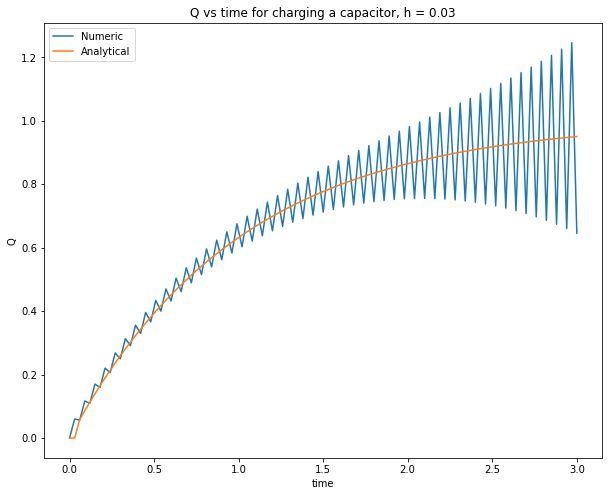

In [5]:
fig = plt.figure(figsize=(10,8))
plt.title('Q vs time for charging a capacitor, h = 0.03')
plt.ylabel('Q')
plt.xlabel('time')
plt.plot(time,Q,'-',label = "Numeric")
plt.plot(time,Q_exact,'-',label = "Analytical")
plt.legend()

Decharge

In [6]:
def decharge(a,b):
    Q_prime=-1*b/(R*C)
    return a + 2*Q_prime*dt

In [7]:
Q=np.zeros(delta+1)
Q_exact=np.zeros(delta+1)
Q[0]=1
Q[1]=2*dt*(-Q[0]) + Q[0]   #euler
Q_exact[1]= (np.exp(-1*(dt)))
for i in range (2,delta+1):
    Q[i]=decharge(Q[i-2],Q[i-1])
    Q_exact[i] = (np.exp(-i*(dt)))
print('final q is',Q[delta])

final q is 0.3545777663297917


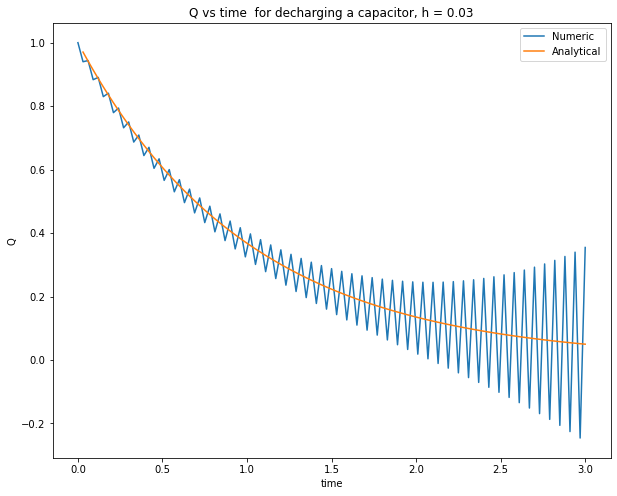

In [8]:
fig = plt.figure(figsize=(10,8))
plt.title('Q vs time  for decharging a capacitor, h = 0.03')
plt.ylabel('Q')
plt.xlabel('time')
plt.plot(time,Q,'-',label = "Numeric")
plt.plot(time[1:],Q_exact[1:],'-',label = "Analytical")
plt.legend()